# Imports

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt 
from helpers import processing, file, analysis, model

E:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
E:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
E:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the num

# Data

Add any necessary functions in `helpers.file`

In [3]:
df = file.sav_file('../st-task/datasets/ethylene_CO.txt')


In [6]:
df.head()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
0,0.00,0.0,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1,0.01,0.0,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
2,0.01,0.0,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
3,0.03,0.0,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
4,0.04,0.0,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32


#ok we load the dataframe , 16 channel sensors with time strap , co and ethylene concntration,lets do processing on it

# Preprocessing

Add any necessary functions in `helpers.processing`

(4208261, 19) shape of dataframe
Time (seconds)         float64
CO2 conc (ppm)         float64
Ethylene conc (ppm)    float64
Sensor1                float64
Sensor2                float64
Sensor3                float64
Sensor4                float64
Sensor5                float64
Sensor6                float64
Sensor7                float64
Sensor8                float64
Sensor9                float64
Sensor10               float64
Sensor11               float64
Sensor12               float64
Sensor13               float64
Sensor14               float64
Sensor15               float64
Sensor16               float64
dtype: object
checking for null values
Time (seconds)         0
CO2 conc (ppm)         0
Ethylene conc (ppm)    0
Sensor1                0
Sensor2                0
Sensor3                0
Sensor4                0
Sensor5                0
Sensor6                0
Sensor7                0
Sensor8                0
Sensor9                0
Sensor10               0
Sensor11      

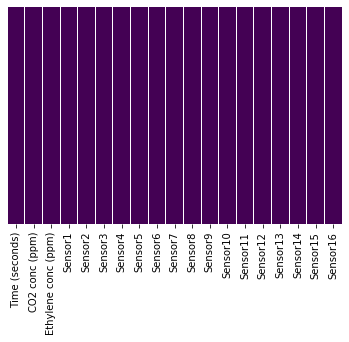

In [7]:
processing.proc(df)

# Analysis

Add any necessary functions in `helpers.analysis`

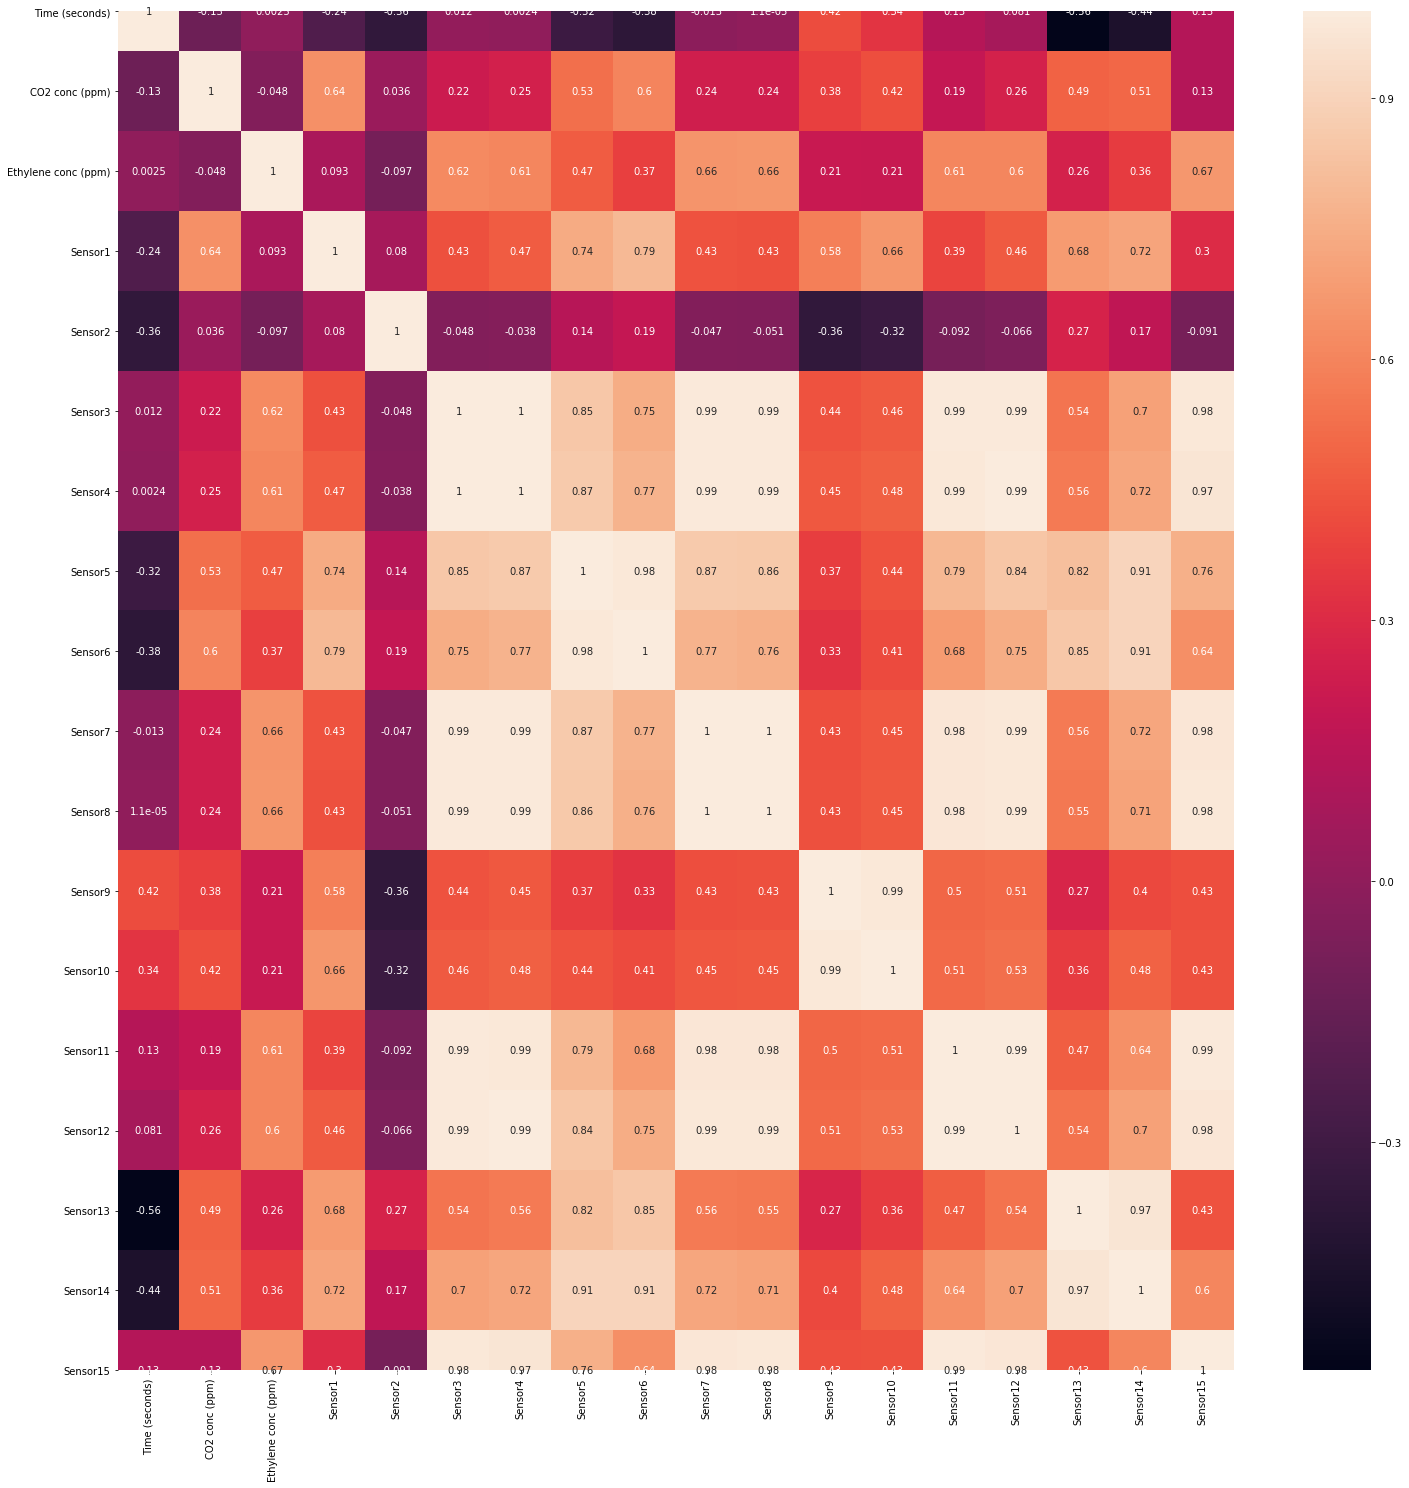

In [8]:
import seaborn as sns



import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(25,25))
sns.heatmap(df[top_features].corr(),annot=True)

In [9]:
# no missing valiues, lets analyze on dataframe

In [10]:
#we will take chunk datapoints for plot against different sensors with gas concentration

In [11]:
#from this we can see sensors influce both gas but one gas is more sensitive other for sensors

Sensor1 Sensor2 Sensor3 Sensor4


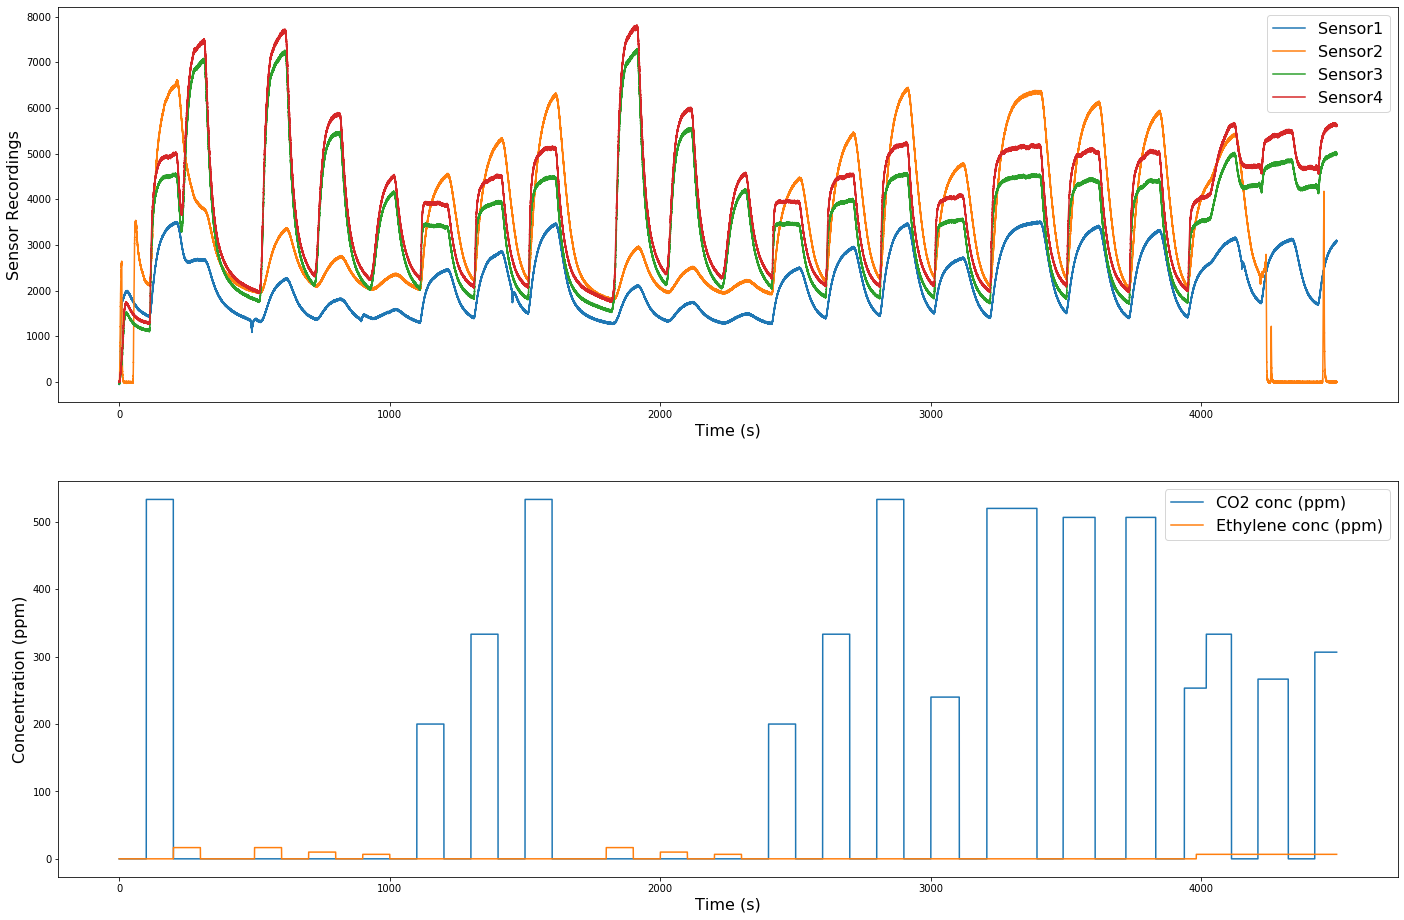

Sensor5 Sensor6 Sensor7 Sensor8


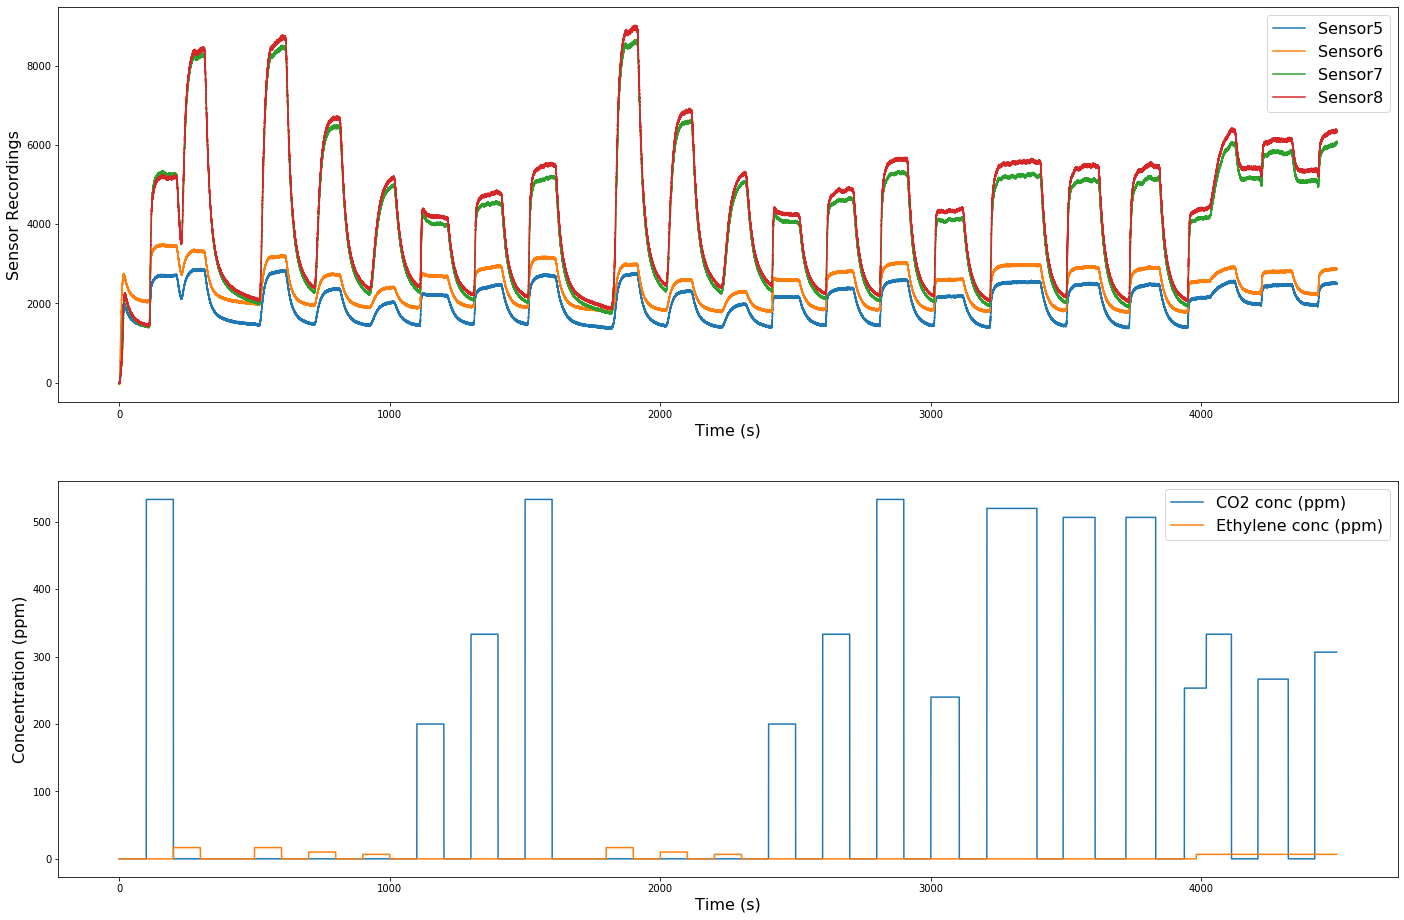

Sensor9 Sensor10 Sensor11 Sensor12


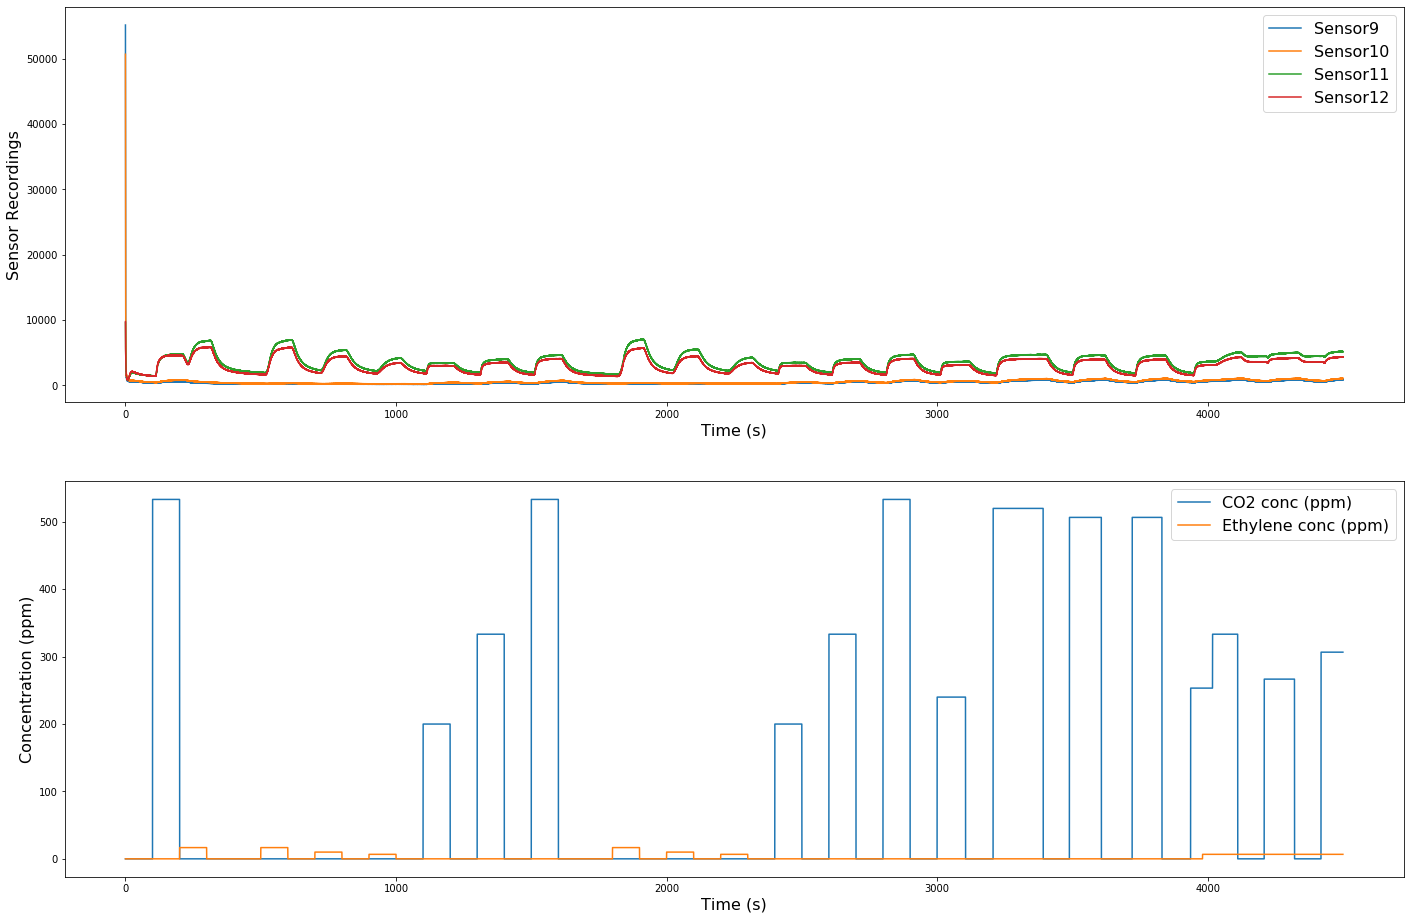

Sensor13 Sensor14 Sensor15 Sensor16


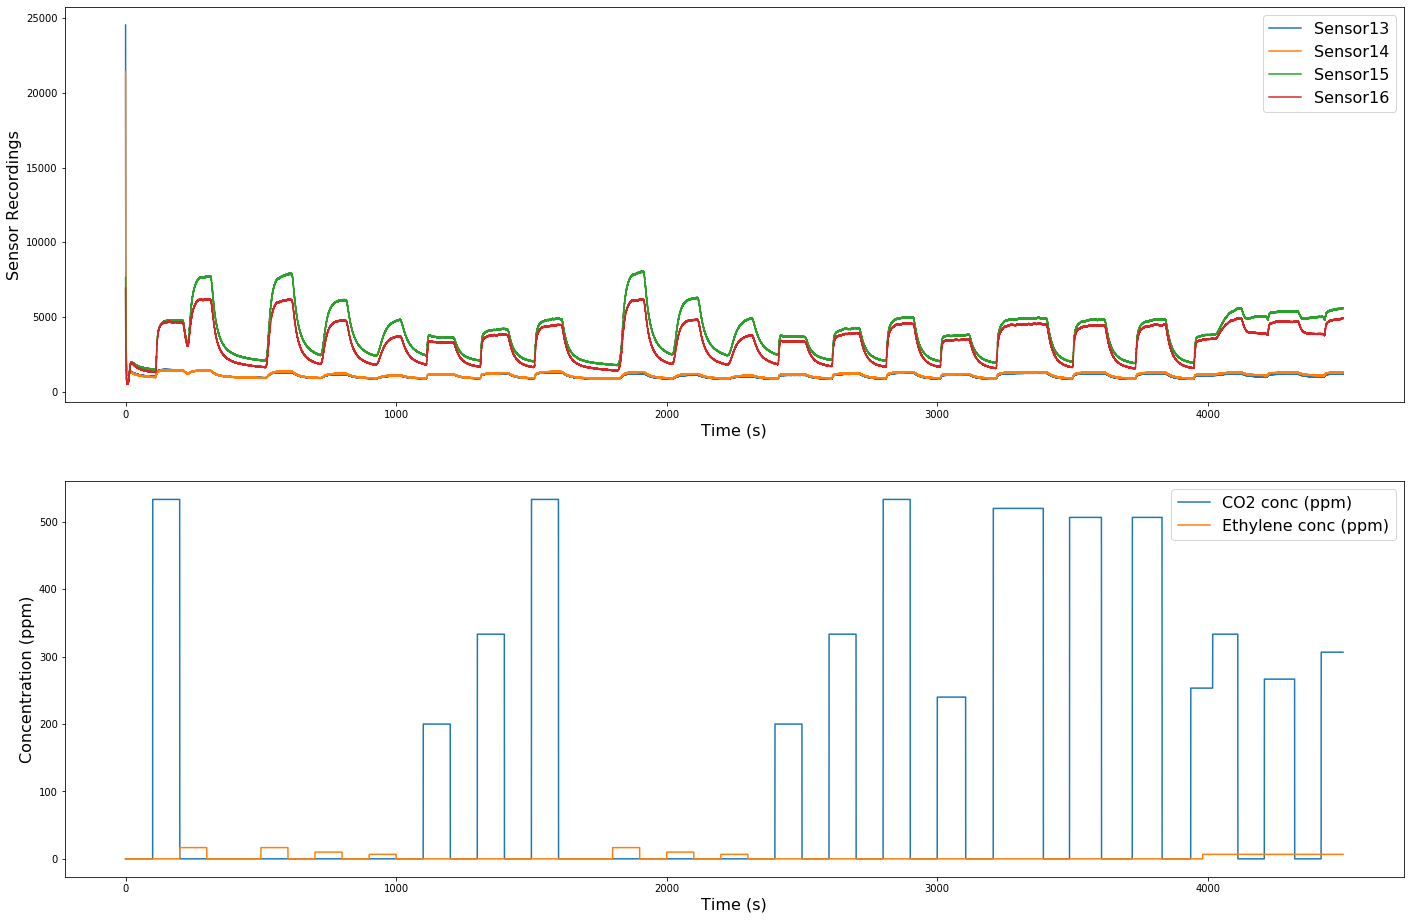

In [9]:
analysis.analys(df)

here, observation
different sensors behave different some are having shark peaks , other may have reading.
all sensors influce gas concentration,some of them have different "amplitudes" and others barely detect changes sensor 15,16
I think there is a lag between sensors change of point that pushes gas readings. 

In [ ]:
#now i will try to analysis the change of point in sensors on gas

In [ ]:
##first I need to reduce the noise in sensors to make it smooth

In [ ]:
##lets take chunk of data for visual and i will apply to whole dataframe

In [12]:
#sort data on time 
sorted_data = analysis.sor(df)

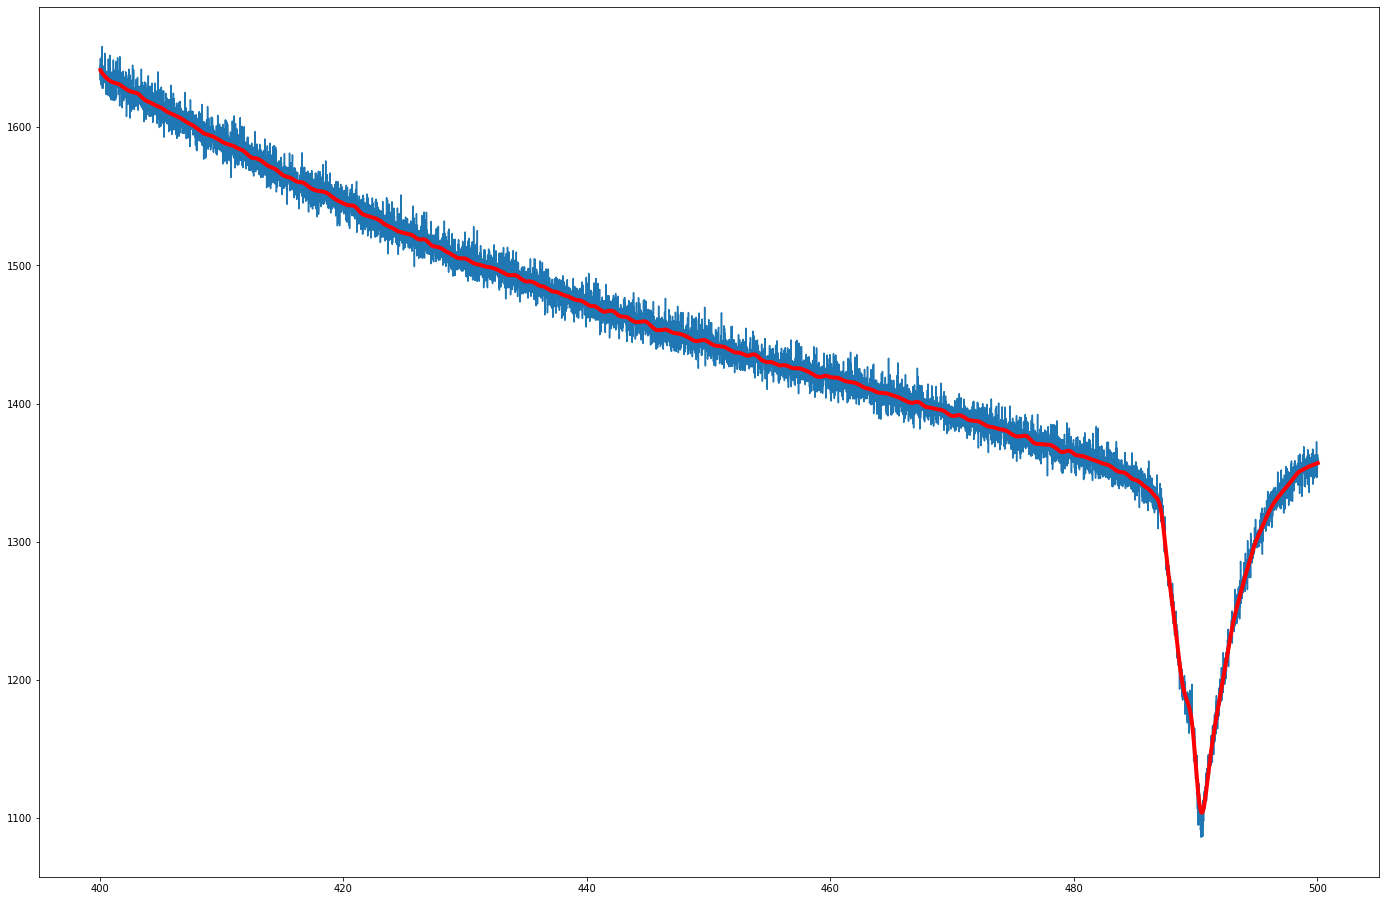

In [13]:
#de noise on check
analysis.chunk_denoise(sorted_data)

In [14]:
#de noise on dataframe
df_smooth = analysis.whole_denoise(sorted_data)

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [15]:
#difference on 10 steps signal to capture more information
df_der = analysis.dif(df_smooth)

In [14]:
#plot the derivatives against the concentrations for all sensors, to see which of them give good, clean peaks for point of change

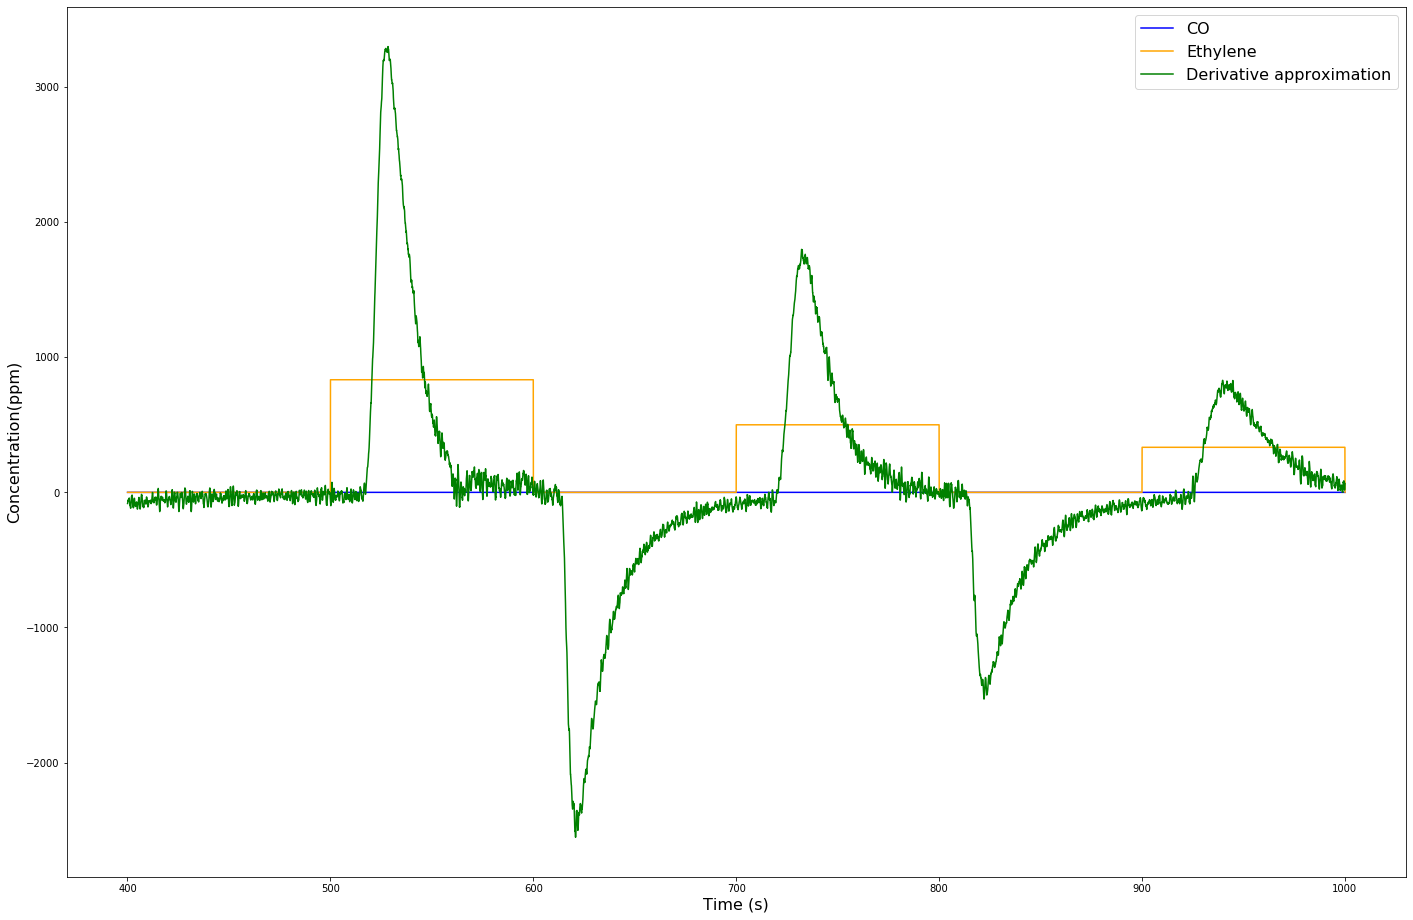

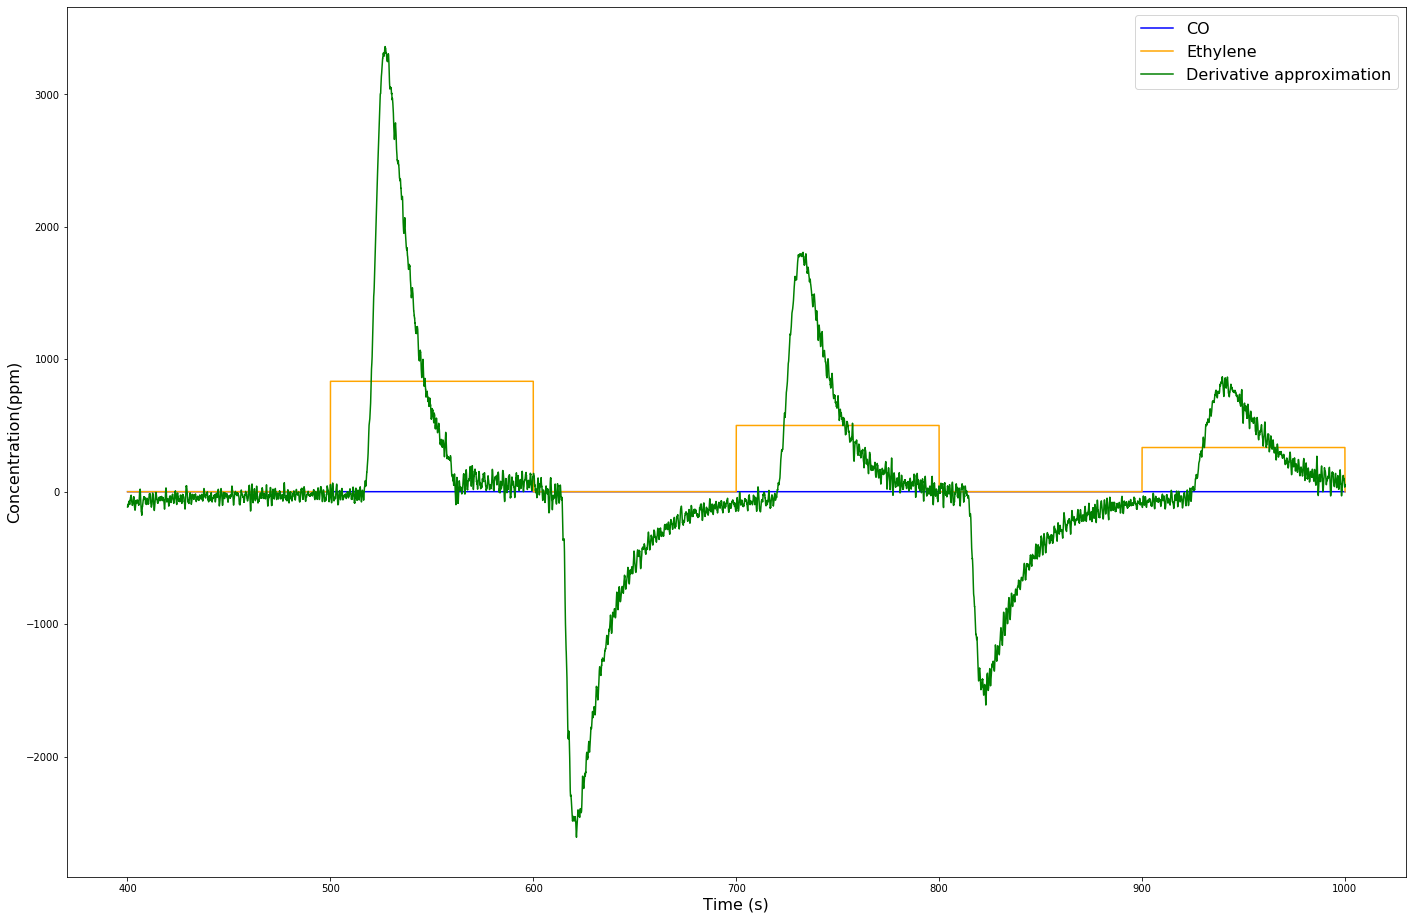

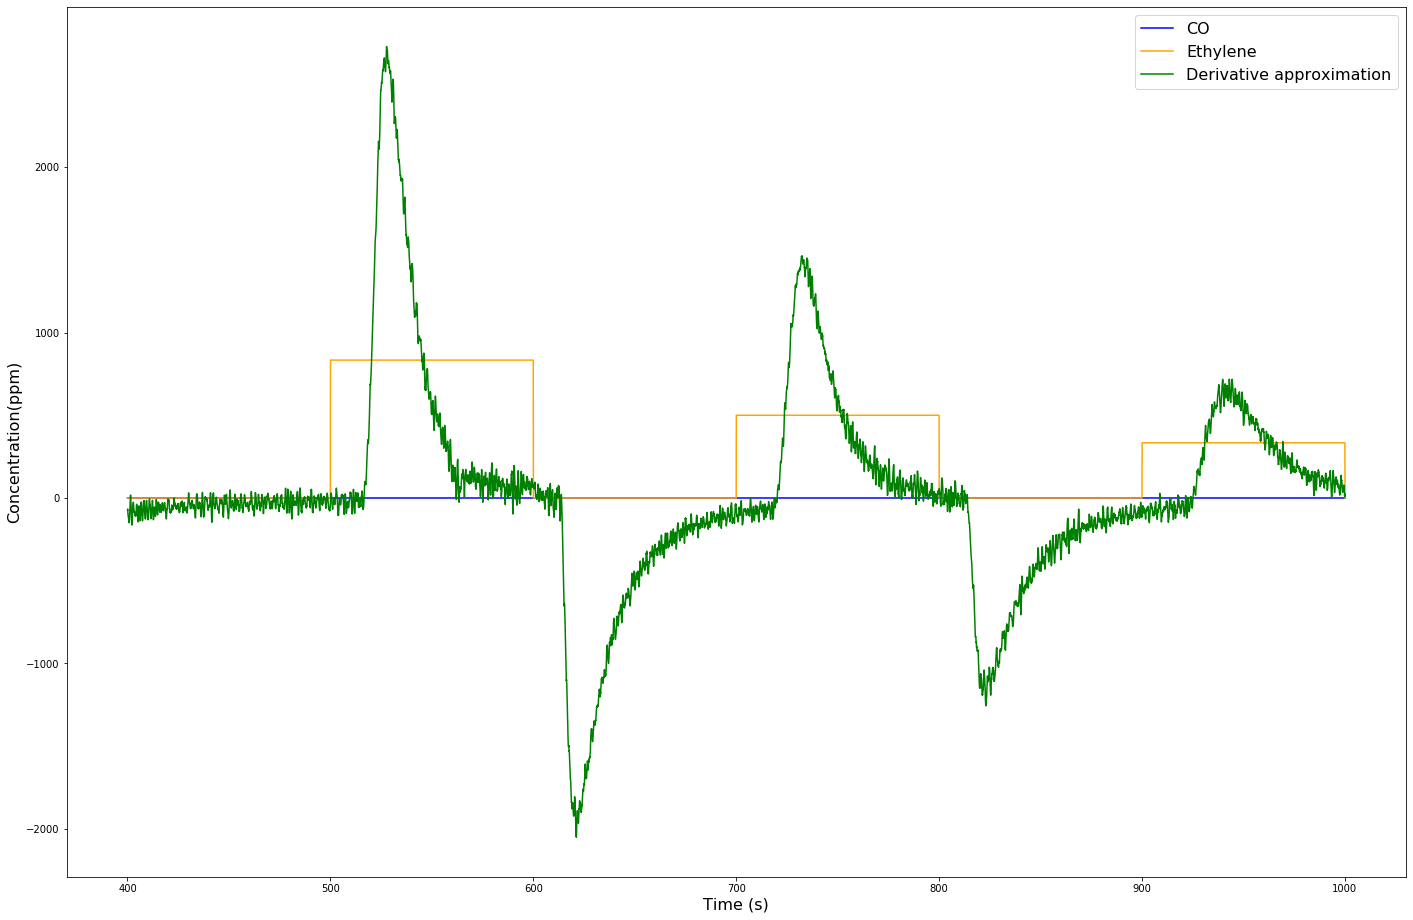

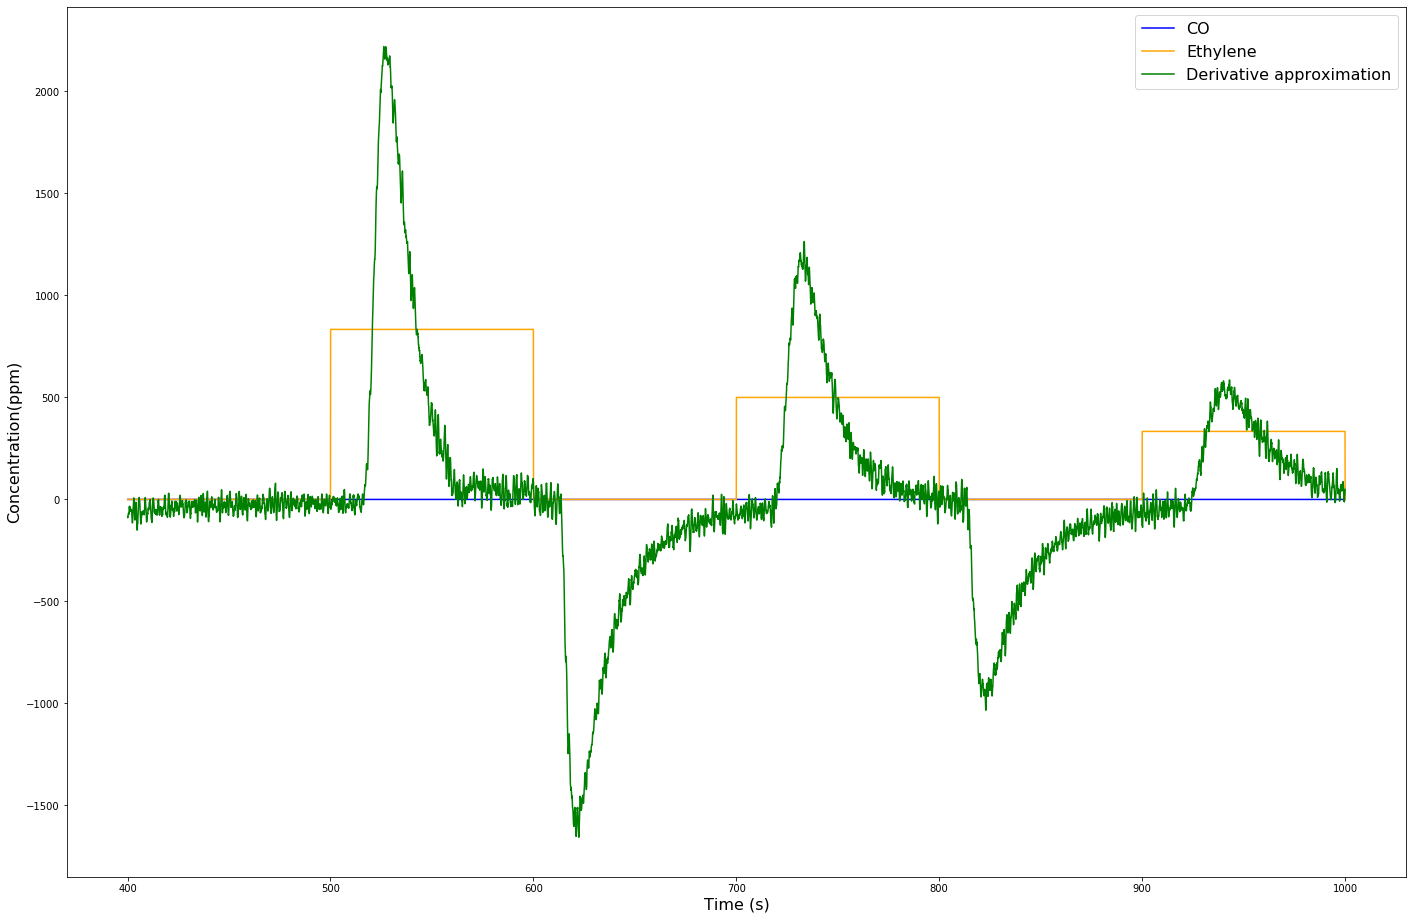

In [16]:
#choose sensors 3 to 18 colums range see its good peak
k=1
for i in [9,10,17,18]:
    analysis.plot_der(i,40000,100000,100,df_smooth,df_der, k)
    k=k+1

In [17]:
#I analyzed the sensors and concluded 5,6,7,9,10,12,13,14,17,18 but more accuarte we can use oeak detection algorithm to check sensors point of change

In [16]:
fea = df_smooth.copy()
fea = fea.drop(["CO2 conc (ppm)","Ethylene conc (ppm)"], axis = 1)
#fea['index_col'] = fea.index

fea.head(3)

,Time (seconds),Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18
0,0.00,-44.242035,-6.973389,-33.559503,3.806088,-1.197602,-31.246897,-9.401629,-0.029527,56263.400764,50861.732126,9239.402769,9335.218262,23033.530367,20047.608816,7297.437544,6605.473968
1,0.01,-44.374851,-7.153161,-33.517160,3.902609,-1.202141,-31.308043,-9.431478,-0.020739,55553.224529,50249.129592,9166.392271,9262.267229,22773.056822,19828.353041,7234.052431,6548.192849
2,0.01,-44.503240,-7.321202,-33.474998,3.998004,-1.205670,-31.366837,-9.460367,-0.011764,54848.181861,49641.023197,9093.861609,9189.796127,22514.659996,19610.829926,7171.108216,6491.309620


In [17]:
y=df_smooth[['CO2 conc (ppm)','Ethylene conc (ppm)']]


# Model

Add any necessary functions in `helpers.model`

In [18]:
co = y['CO2 conc (ppm)'].to_numpy()
eth = y['Ethylene conc (ppm)'].to_numpy()
co_pred,eth_pred = model.lasml(fea,y)


E:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1803: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147166308.82583237, tolerance: 9104297.28378073
  check_random_state(self.random_state), random)


In [1]:
#reconstruction test and predtion yesssssss got it 

E:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


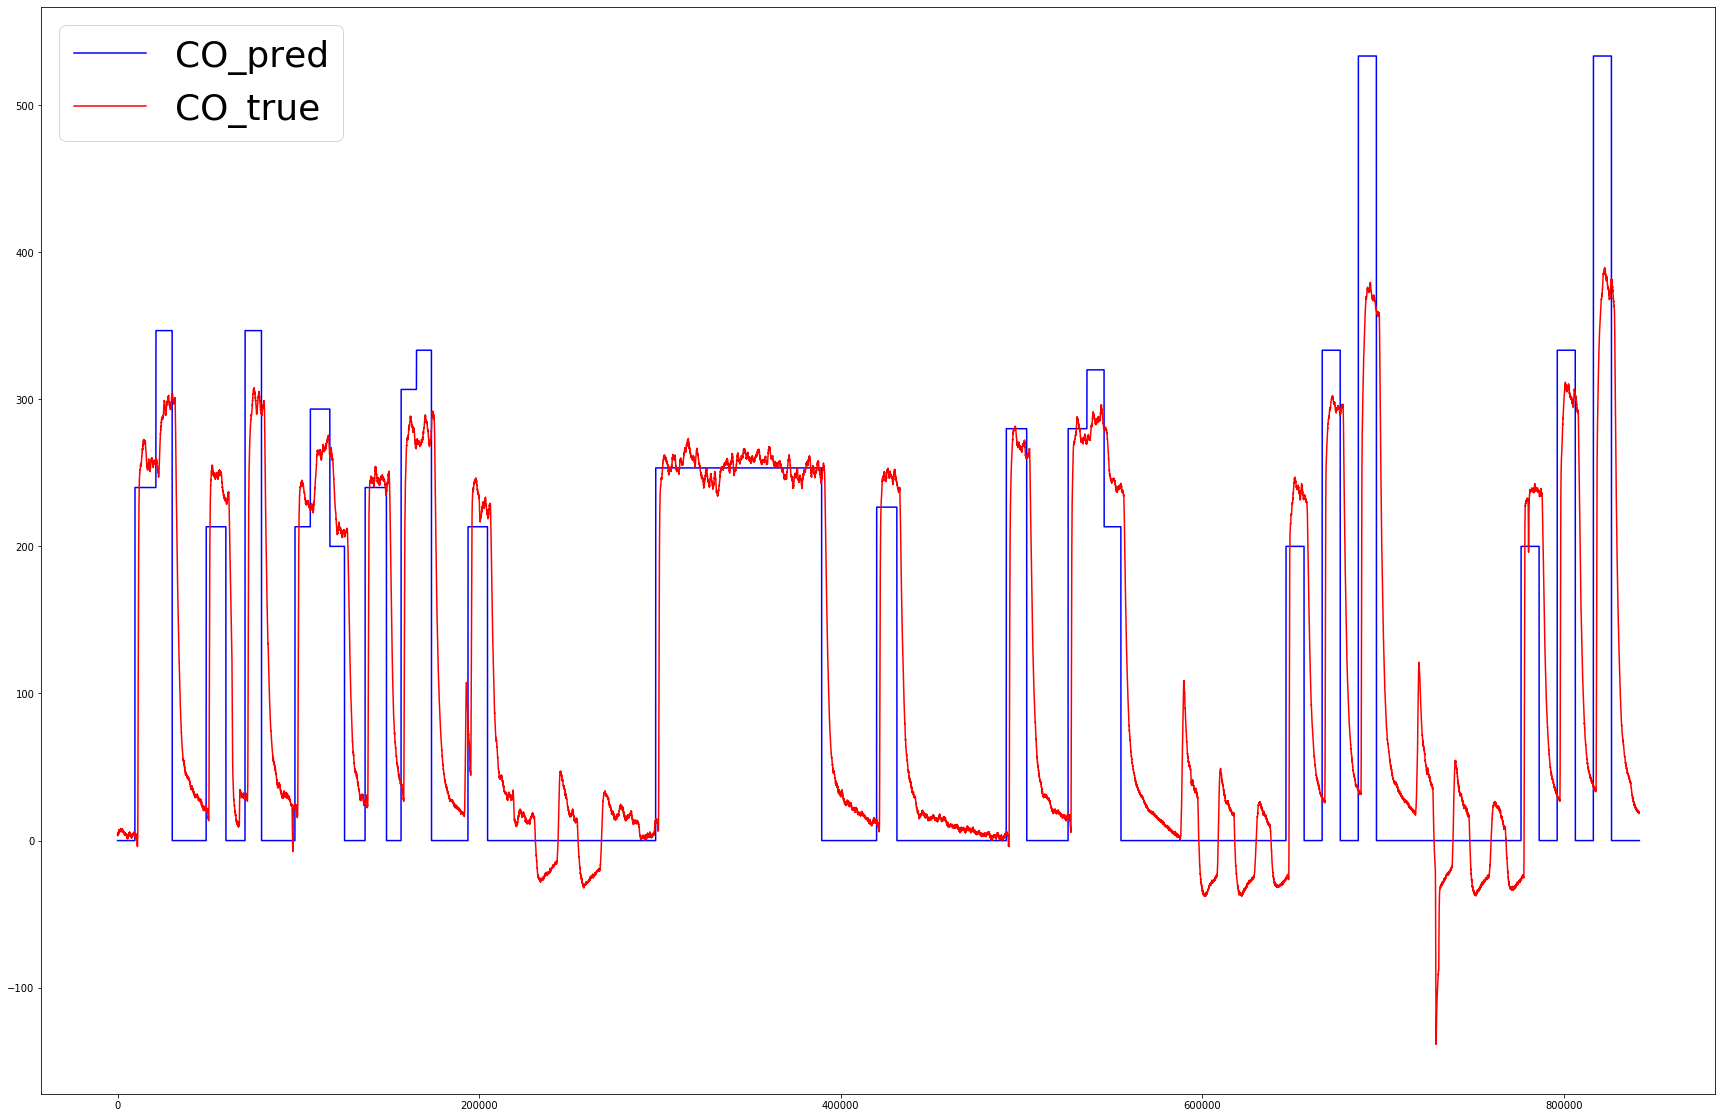

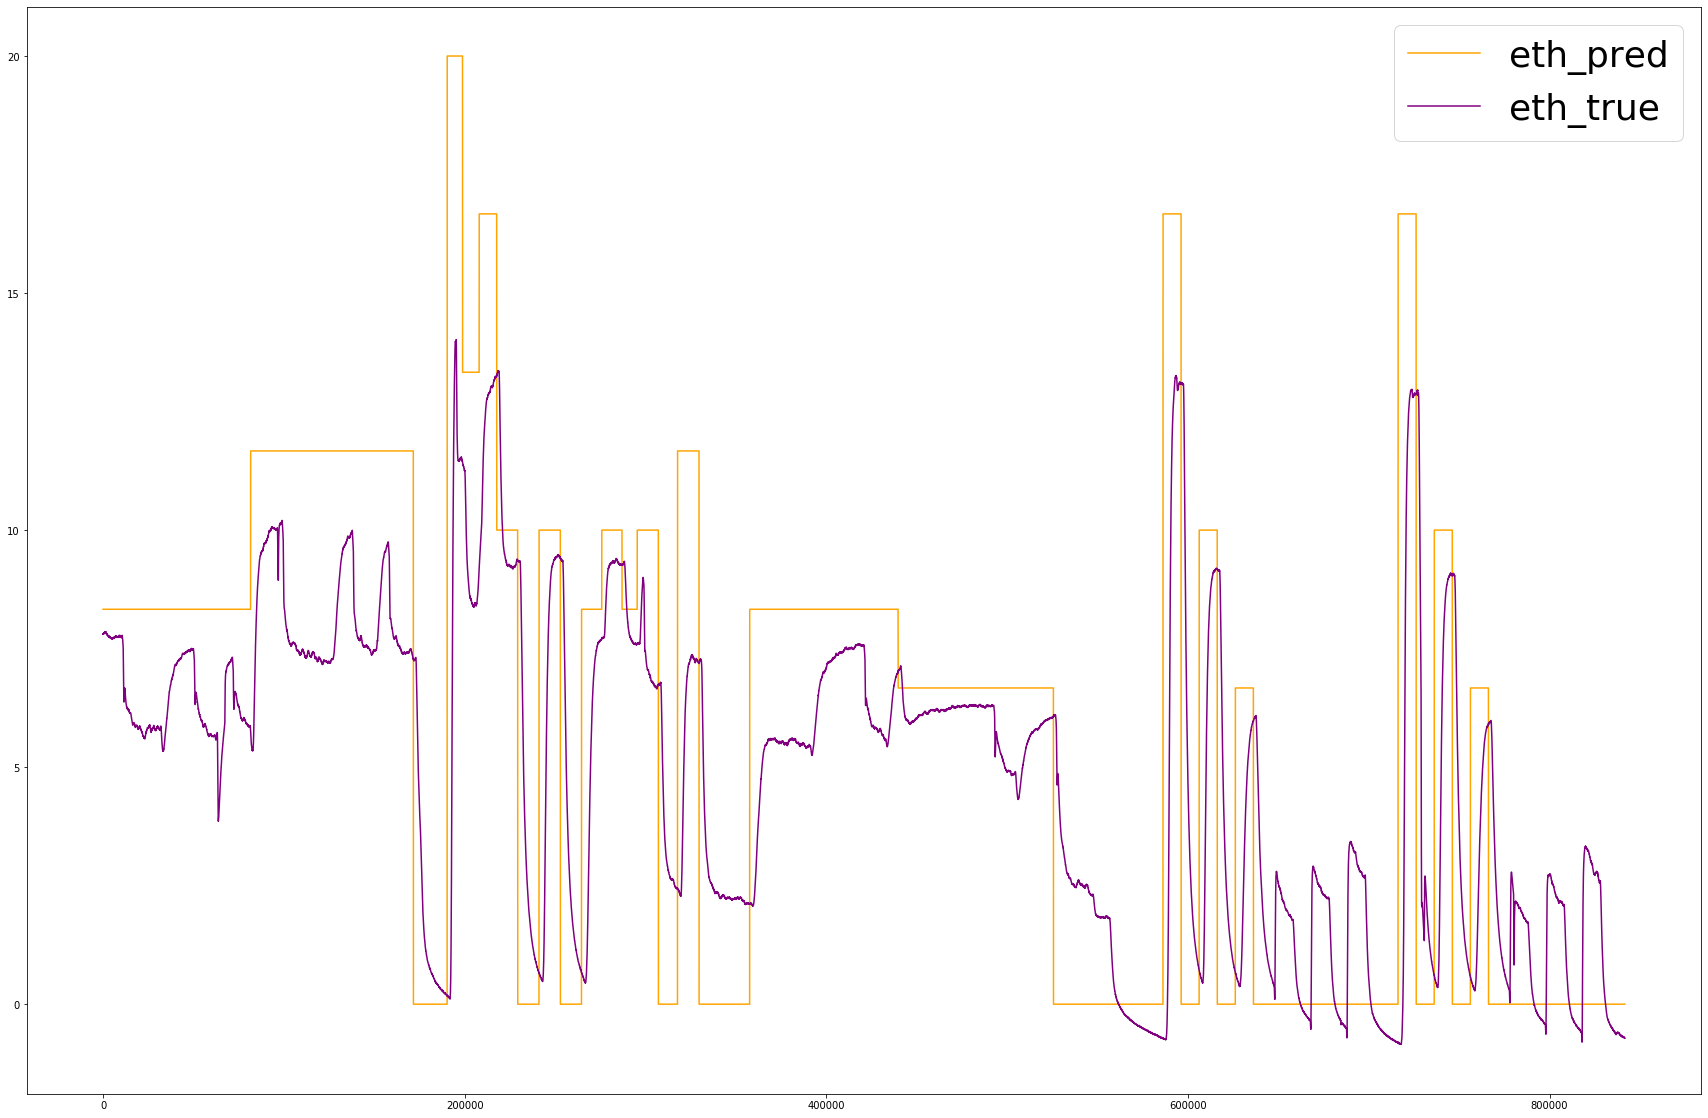

In [19]:
model.evalut(co,co_pred,eth,eth_pred)

In [ ]:
# we can try SVR to capture better , I tried and it takes lot of results in craching my system sorry form my laptop

In [ ]:
#another method


In [ ]:
#tsfresh feature extraction it take

In [ ]:
#but i will used all sensors and extract the features from it using tsfresh extraction takes lot of time , I crashed my system while extracting

In [ ]:
X,X_filtered = model.feat(fea)

In [ ]:
X_full_train, X_full_test, y_train, y_test = train_test_split(x, y, test_size=.2)
X_filtered_train, X_filtered_test = X_full_train[X_filtered.columns], X_full_test[X_filtered.columns]

In [ ]:
model2 = linear_model.MultiTaskLasso(alpha=1200)
model2.fit(X_filtered_train, y_train)
    
ypred=model2.predict(X_full_test)
